# **Card Transaction History Analysis & Customer Segmentation**  
---
> **Context**

* Project Summary
* Situation Introduction
  - Process 1
  - Process 2
  - Process 3

## **Project Summary**
---

> **Project Title**

```
▶ Card Transaction History Analysis & Customer Segmentation
```  

> **Project Type**

```
▶ Data EDA & Insight Extraction
```


## **Situation Introduction**
---
> **Scenario** 

```
A company is planning to launch a new store, with no historical commercial district data. Especially, it is uncertain whether the brand’s profile aligns with the spending behavior of customers residing in that area. The company will analyze credit card spending data to profile local customers’ consumption patterns and compare them against the brand’s characteristics, enabling a data-driven decision on whether to proceed.

```  

> **Problem Definition**

```
▶ Unclear commercial viability of the target area for new brand entry

```  

> **Expected Outcome**

```
▶ Determine feasibility of entering the new commercial district
▶ Understand local customer spending behavior
```

> **Proposed Solution**

```
▶ Analyze regional residents’ consumption behavior using credit card spending data
▶ Match the consumption profile to the brand’s target profile to support entry decision-making

```

> **Performance Metric**  

```
▶ Final decision on new market entry
```

> **Operations**  

```
▶ Deliver insights through a comprehensive analytical report for management review

```

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
df = pd.read_csv('transaction.csv')
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [3]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **Process 1**  
- **Analysis of usage patterns by industry**  
---

### Data Preprocessing  
---
* Review the basic characteristics of the collected dataset: 

  (1) Check data shape

  (2) Verify data type

  (3) Identify missing values

  (4) Detect outliers

In [4]:
print('df', df.shape)

df (3362796, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [6]:
print(df.isnull().sum())

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64


In [7]:
df.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


In [8]:
df['installments'].fillna(0,inplace=True)

In [9]:
print(df.isnull().sum())

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64


### Analysis of the share of use and sales by industry
---  

In [10]:
df['store_id'].value_counts()

store_id
0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
1605        1
991         1
1263        1
1530        1
632         1
Name: count, Length: 1775, dtype: int64

In [11]:
df_store = pd.DataFrame(df['store_id'].value_counts()).reset_index()
df_store.columns = ['store_id', 'cnt']
df_store.head(5)

,store_id,cnt
0,0,68773
1,753,39318
2,105,36063
3,1342,33335
4,428,33285


In [12]:
df_store['total'] = df_store['cnt'].sum()
df_store['ratio'] = round( (df_store['cnt'] / df_store['total']) * 100,2)
df_store.head(10)

,store_id,cnt,total,ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99
5,221,31409,3362796,0.93
6,161,27170,3362796,0.81
7,1038,25694,3362796,0.76
8,323,25221,3362796,0.75
9,1366,24946,3362796,0.74


In [13]:
df_amt = pd.DataFrame(df['amount'].groupby(df['store_id']).sum()).reset_index()
df_amt.head(5)

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
3,3,62781
4,4,270312


In [14]:
df_amt = df_amt.sort_values(by=['amount'], ascending=False)
df_amt.head(5)

,store_id,amount
746,753,9474601
1326,1342,7301327
158,161,5236075
0,0,5234611
948,958,4965728


In [15]:
df_amt['total'] = df_amt['amount'].sum()
df_amt['ratio'] = round( (df_amt['amount'] / df_amt['total']) * 100,2)
df_amt.head(10)

,store_id,amount,total,ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01
1065,1076,4860885,490841453,0.99
801,810,3677501,490841453,0.75
1013,1024,3330293,490841453,0.68
480,486,3235482,490841453,0.66
590,597,2999180,490841453,0.61


## **Process 2**  
- **Exploring Key Industries**  
---

### Analysis of the number of customers used by industry
---

In [16]:
df_store.columns = ['store_id', 'cnt', 'cnt_total', 'cnt_ratio']
df_store.head(5)

,store_id,cnt,cnt_total,cnt_ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99


In [17]:
df_amt.columns = ['store_id', 'amt', 'amt_total', 'amt_ratio']
df_amt.head(5)

,store_id,amt,amt_total,amt_ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01


In [18]:
df_merge = pd.merge(df_store, df_amt , how='left', on='store_id')
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07
1,753,39318,3362796,1.17,9474601,490841453,1.93
2,105,36063,3362796,1.07,2991082,490841453,0.61
3,1342,33335,3362796,0.99,7301327,490841453,1.49
4,428,33285,3362796,0.99,1312204,490841453,0.27


In [19]:
df_customer = pd.DataFrame(df['card_id'].groupby(df['store_id']).nunique()).reset_index()
df_customer.columns = ['store_id', 'customer']
df_customer['customer_total'] = df['card_id'].nunique()
df_customer['customer_ratio'] = round((df_customer['customer'] / df_customer['customer_total'])*100,2)
df_customer.head(5)

,store_id,customer,customer_total,customer_ratio
0,0,12727,922522,1.38
1,1,8,922522,0.00
2,2,9053,922522,0.98
3,3,231,922522,0.03
4,4,1176,922522,0.13


In [20]:
df_customer.sort_values(by=['customer_ratio'], ascending = False).head(10)

,store_id,customer,customer_total,customer_ratio
423,428,18456,922522,2.00
218,221,17161,922522,1.86
289,293,14915,922522,1.62
1326,1342,14789,922522,1.60
932,942,13760,922522,1.49
1196,1209,13512,922522,1.46
0,0,12727,922522,1.38
1027,1038,12523,922522,1.36
746,753,11960,922522,1.30
123,126,11070,922522,1.20


In [21]:
df_merge = pd.merge(df_merge, df_customer, how='left', on='store_id')
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00


### One-time usage amount/customer unit price analysis
---

In [22]:
# One-time usage amount
df_merge['amt_per_use'] = round(df_merge['amt'] / df_merge['cnt'],0)

# customer unit price analysis
df_merge['cus_per_use'] = round(df_merge['amt'] / df_merge['customer'],0)

df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0


### Define core industries
---

In [23]:
# Define a new score by applying weights to the percentage of use, the percentage of use, and the percentage of customers used
# cnt_ratio(a)
# amt_ratio(b)
# customer_ratio(c)

a = 0.3
b = 0.35
c = 0.35

df_merge['core_store'] = df_merge['cnt_ratio']*a + df_merge['amt_ratio']*b + df_merge['customer_ratio']*c
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915


In [24]:
# convert to 100 scale using Min-max standardization
df_merge['core_store_scaled'] = df_merge['core_store'].apply(lambda x: (x - df_merge['core_store'].min())  / (df_merge['core_store'].max() - df_merge['core_store'].min()) )
df_merge['core_store_scaled'] = round(df_merge['core_store_scaled'] * 100,0)
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460,57.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


In [25]:
df_merge.sort_values(by=['core_store_scaled'], ascending=False).head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
5,221,31409,3362796,0.93,2513245,490841453,0.51,17161,922522,1.86,80.0,146.0,1.1085,75.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


## **Process 3**  
- **additional analysis on core industries**  
---

### Core Industries Weekends/Weekdays/ Holidays Analysis
---

In [26]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [27]:
df_core_store = df[df['store_id'].isin([753, 0, 1342, 221, 428])]
df_core_store['store_id'].value_counts()

store_id
0       68773
753     39318
1342    33335
428     33285
221     31409
Name: count, dtype: int64

In [28]:
df_core_store['days_of_week'].value_counts()

days_of_week
5    32850
6    30772
4    29282
2    28635
3    28269
1    28159
0    28153
Name: count, dtype: int64

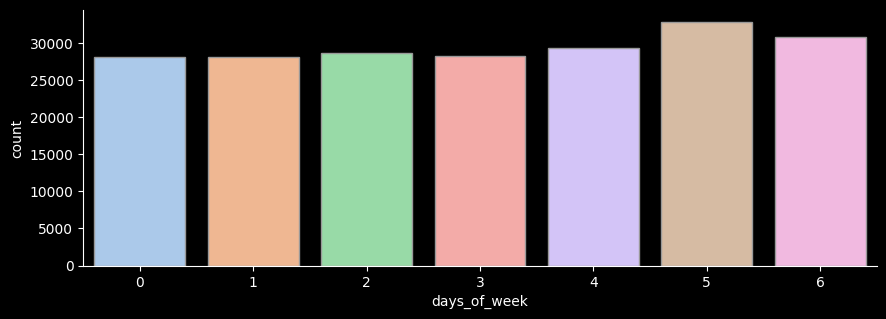

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="days_of_week", kind="count",palette="pastel", edgecolor=".6",data=df_core_store)
plt.gcf().set_size_inches(10, 3)

In [29]:
# compare weekends vs weekdays
import numpy as np
df_core_store['weekend'] = np.where(df_core_store['days_of_week'].isin([5,6]), 1, 0)
df_core_store['weekend'].value_counts()

weekend
0    142498
1     63622
Name: count, dtype: int64

Saving figure core_weekend_vs_weekday


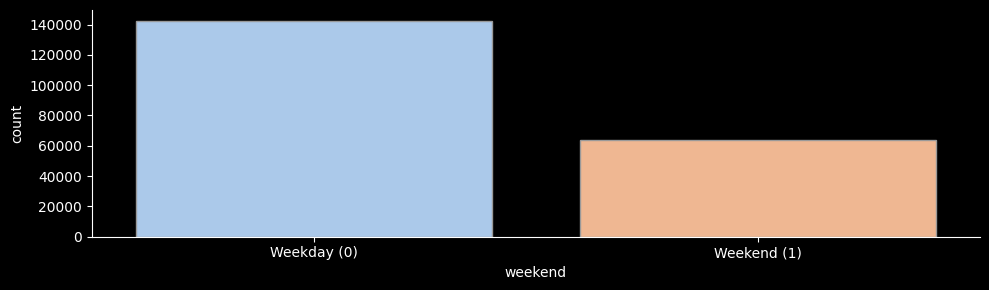

In [30]:
# plot weekend(1), weekdays(0)
sns.catplot(x="weekend", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)
plt.xticks([0,1], ["Weekday (0)", "Weekend (1)"])
save_fig("core_weekend_vs_weekday")

Saving figure core_holiday_vs_nonholiday


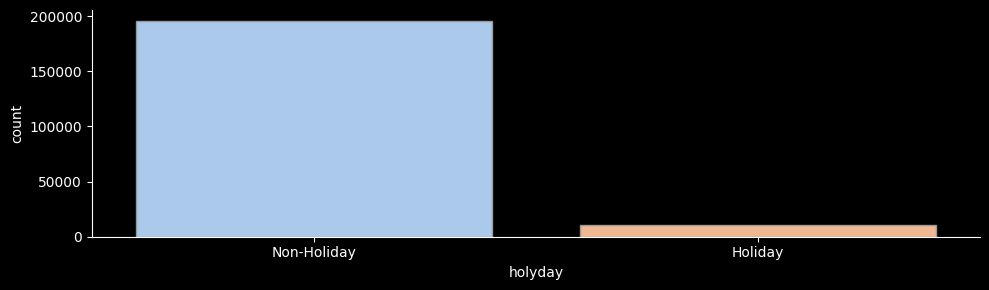

In [31]:
# Compare consumption by holiday
sns.catplot(x="holyday", kind="count",palette="pastel", edgecolor=".6",data=df_core_store)
plt.gcf().set_size_inches(10, 3)
plt.xticks([0,1], ["Non-Holiday", "Holiday"])
save_fig("core_holiday_vs_nonholiday")

### Analysis of lump-sum payments and installment payments in core industries
---

In [32]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


Saving figure core_installments_count


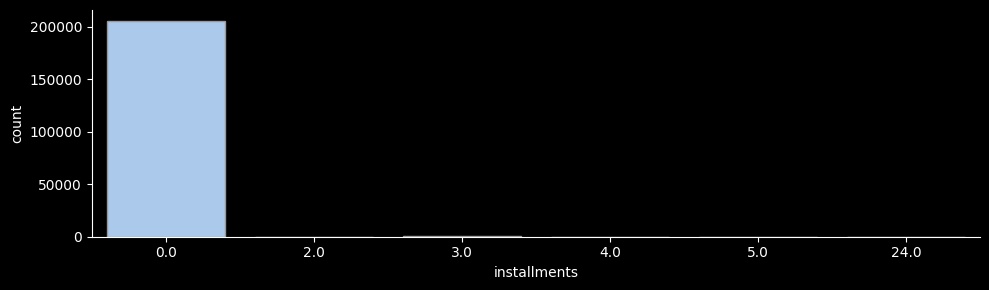

In [33]:
sns.catplot(x="installments", kind="count",palette="pastel", edgecolor=".6",data=df_core_store)
plt.gcf().set_size_inches(10, 3)
save_fig("core_installments_count")

In [34]:
df_core_store['installments'].value_counts()

installments
0.0     205454
3.0        477
2.0        172
5.0         12
24.0         3
4.0          2
Name: count, dtype: int64

### Analysis of Cancellation Amount of Key Industries
---

In [35]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [36]:
abs(df_core_store[df_core_store['amount'] < 0]['amount'].sum()) / df_core_store['amount'].sum() * 100

0.8132183681150494

In [37]:
df1 = df_core_store[df_core_store['store_id']==753]
df2 = df_core_store[df_core_store['store_id']==0]
df3 = df_core_store[df_core_store['store_id']==1342]
df4 = df_core_store[df_core_store['store_id']==221]
df5 = df_core_store[df_core_store['store_id']==428]


print("store(753) :", abs(df1[df1['amount'] < 0]['amount'].sum()) / df1['amount'].sum() * 100)
print("store(0) :", abs(df2[df2['amount'] < 0]['amount'].sum()) / df2['amount'].sum() * 100)
print("store(1342) :", abs(df3[df3['amount'] < 0]['amount'].sum()) / df3['amount'].sum() * 100)
print("store(221) :", abs(df4[df4['amount'] < 0]['amount'].sum()) / df4['amount'].sum() * 100)
print("store(428) :", abs(df5[df5['amount'] < 0]['amount'].sum()) / df5['amount'].sum() * 100)

store(753) : 0.38674979558505945
store(0) : 1.396741801826344
store(1342) : 0.5834555828002225
store(221) : 1.7059220251109624
store(428) : 1.1333603616510848


### Analysis of changes in the share of sales by year in core industries
---

In [38]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [39]:
import datetime
df_core_store['Date_merge'] = df['date'].astype(str) + ' ' + df['time'].astype(str)
df_core_store['Date_merge'] = pd.to_datetime(df_core_store['Date_merge'])

In [40]:
# Aug,1,2016 -  July,31,2018
df_core_store['Date_merge'].min(), df_core_store['Date_merge'].max()

(Timestamp('2016-08-01 00:14:51'), Timestamp('2018-07-31 23:56:14'))

In [41]:
df_core_store['year'] = df_core_store['Date_merge'].dt.year
df_core_store['month'] = df_core_store['Date_merge'].dt.month
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend,Date_merge,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0,2016-12-14 18:05:31,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0,2016-12-14 18:05:54,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0,2016-12-19 12:42:31,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0,2016-12-19 12:48:08,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0,2016-12-19 13:31:08,2016,12


In [42]:
df_year = pd.DataFrame(df_core_store.groupby(['store_id', 'year'])['amount'].sum()).reset_index()
df_year.head(6)

,store_id,year,amount
0,0,2016,137336
1,0,2017,3235476
2,0,2018,1861799
3,221,2016,528397
4,221,2017,1318231
5,221,2018,666617


In [43]:
df_pivot = pd.pivot_table(df_year,
                      index = 'year',
                      columns = 'store_id',
                      values = 'amount')
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

df_pivot = df_pivot.set_index('year')

df_pivot = df_pivot.fillna(0)

df_pivot['total'] = df_pivot.iloc[:,0] + df_pivot.iloc[:,1] + df_pivot.iloc[:,2] + df_pivot.iloc[:,3] + df_pivot.iloc[:,4]

df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,137336.0,528397.0,305336.0,525324.0,0.0,1496393.0
2017,3235476.0,1318231.0,665009.0,8129699.0,5113535.0,18461950.0
2018,1861799.0,666617.0,341859.0,819578.0,2187792.0,5877645.0


In [44]:
df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000,1496393.0
2017,0.175251,0.071403,0.036021,0.440349,0.276977,18461950.0
2018,0.316759,0.113416,0.058163,0.139440,0.372223,5877645.0


In [45]:
df_pivot = df_pivot.drop(['total'], axis=1)
df_pivot

,0,221,428,753,1342
year,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000
2017,0.175251,0.071403,0.036021,0.440349,0.276977
2018,0.316759,0.113416,0.058163,0.139440,0.372223


Saving figure yoy_sales_share_core


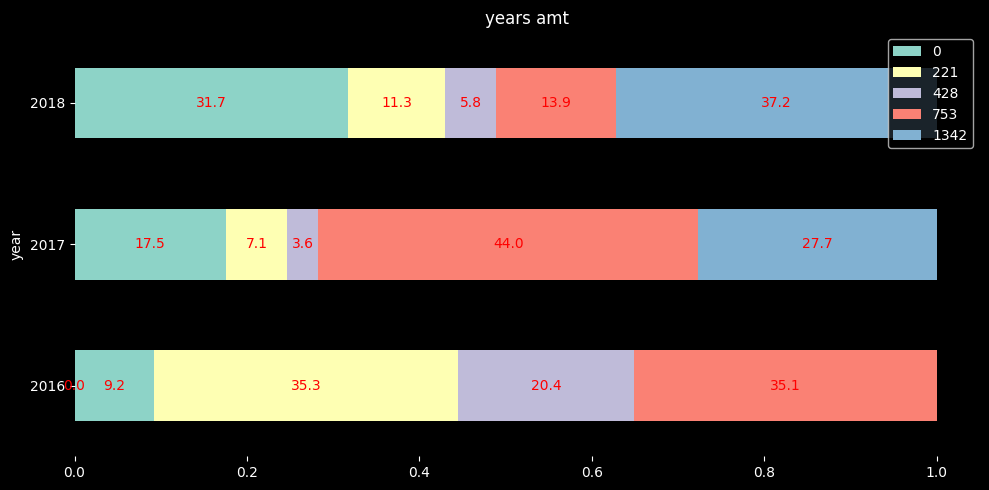

In [46]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use(['dark_background'])

ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='r');

plt.box(False)
plt.gcf().set_size_inches(10, 5)
save_fig("yoy_sales_share_core")
plt.show()